In [2]:
%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats, integrate

sns.set(color_codes=True)
np.random.seed(sum(map(ord, 'distributions')))

## 绘制单变量分布 univariate distribution

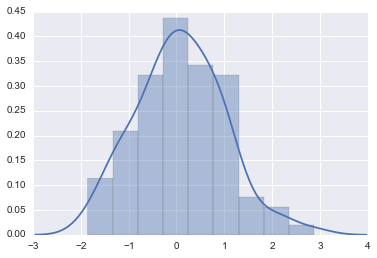

In [3]:
x = np.random.normal(size=100)
sns.distplot(x);

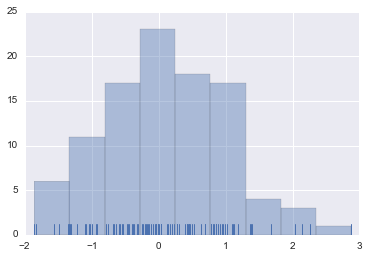

In [4]:
sns.distplot(x, kde=False, rug=True) 
# kde: gaussian kernel density estimate

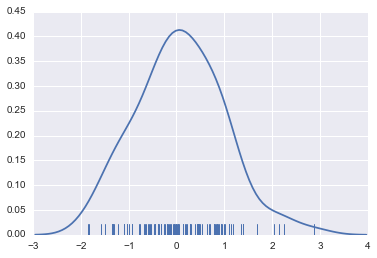

In [5]:
sns.distplot(x, hist=False, rug=True)

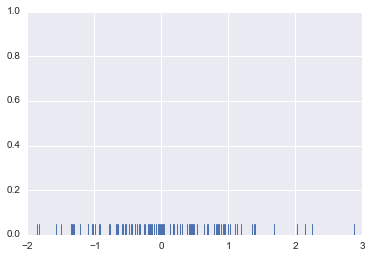

In [6]:
sns.rugplot(x)

In [7]:
x = np.random.normal(0, 1, size=30)
bandwidth = 1.06*x.std() * x.size ** (-1/5.)
support = np.linspace(-4, 4, 200)

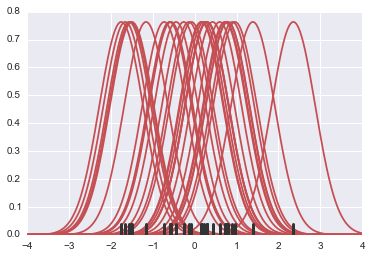

In [8]:
kernels = []
for x_i in x:

    kernel = stats.norm(x_i, bandwidth).pdf(support)
    kernels.append(kernel)
    plt.plot(support, kernel, color="r")
sns.rugplot(x, color=".2", linewidth=3);

c:\users\qingshan\miniconda2\envs\dnn\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


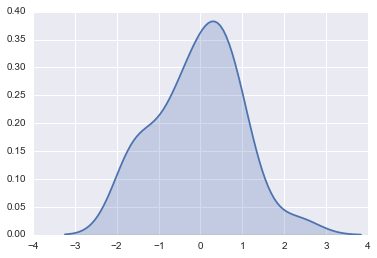

In [9]:
sns.kdeplot(x, shade=True)

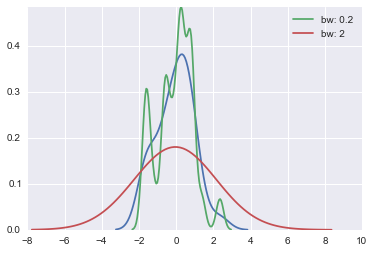

In [10]:
sns.kdeplot(x)
sns.kdeplot(x, bw=.2, label="bw: 0.2")
sns.kdeplot(x, bw=2, label="bw: 2")
plt.legend();

## Fitting parametric distributions

In [11]:
x = np.random.gamma(6, size=200)
print(x)

[  2.99907362   4.09313548  12.12571198   7.01256669   4.9557517
   4.05953038   3.74197101   6.82790648   6.23961483   2.62931586
   5.05144745   5.01772557   6.20751631   4.07702762  11.23941262
   3.971715     6.30727009   6.60628601   5.93604259   3.66254408
   9.01548014   7.9995251    6.27571208   6.59253863   5.02382157
   2.49944156   5.05324528   7.12339718   2.80286283   7.1520659
   6.72503671   7.22150757   7.83375188   3.25537349  10.87087732
   5.61507973   8.09679917   3.59759672   9.66873549   3.94310378
   6.14644894   4.61396081   2.70858847   4.7404292    5.63583857
   6.12379183   3.94558998   5.44674012   4.62825446   6.84155672
   8.11696485   4.76596201   7.54544976   9.17533288   1.81818774
  11.31200013   4.15554974   3.1615185    8.23974891   6.29557631
   4.07736663   1.9071141    6.22394495   4.68303804   9.98624638
   2.55604041   7.05209034  13.05710095  10.65979103   6.74804465
   6.33104806   3.48737172   3.14098553   7.27471215   4.9824089
   4.62144239

In [12]:
np.random.gamma?

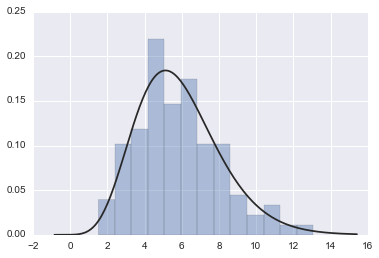

In [13]:
sns.distplot(x, kde=False, fit=stats.gamma);

Plotting bivariate distributions

In [14]:
mean, cov = [0, 1], [(1, .5), (.5, 1)]

In [16]:
data = np.random.multivariate_normal(mean, cov, 200)

In [17]:
df = pd.DataFrame(data, columns=["X", "Y"])

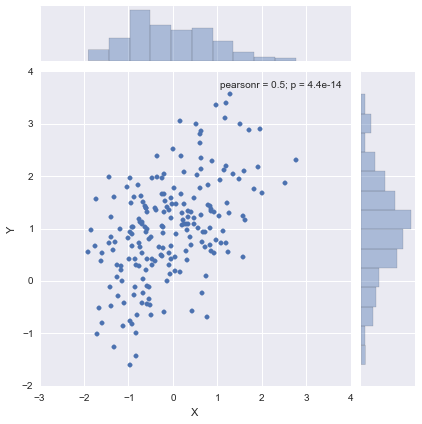

In [20]:
sns.jointplot(x="X", y="Y", data = df)

In [21]:
np.random.multivariate_normal?

In [22]:
x, y = np.random.multivariate_normal(mean, cov, 1000).T

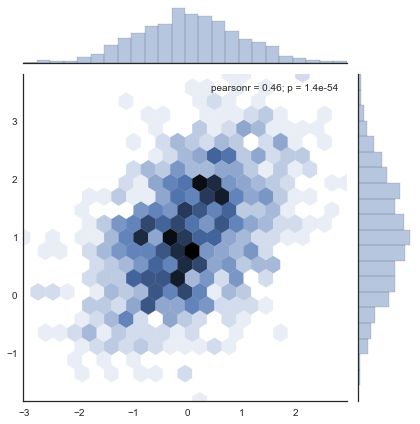

In [29]:
with sns.axes_style("white"):
    sns.jointplot(x=x, y=y, kind="hex")

c:\users\qingshan\miniconda2\envs\dnn\lib\site-packages\numpy\ma\core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.maximum.reduce will be axis=0, not the current None, to match np.maximum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
c:\users\qingshan\miniconda2\envs\dnn\lib\site-packages\numpy\ma\core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)


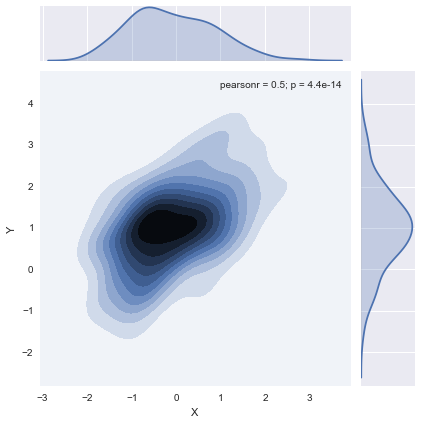

In [32]:
sns.jointplot(x="X", y="Y", data=df, kind="kde")

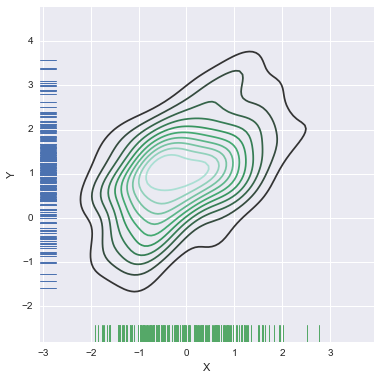

In [39]:
f, ax = plt.subplots(figsize=(6,6))
sns.kdeplot(df.X, df.Y, ax=ax)
sns.rugplot(df.X, color='g', ax=ax)
sns.rugplot(df.Y, vertical=True, ax=ax)

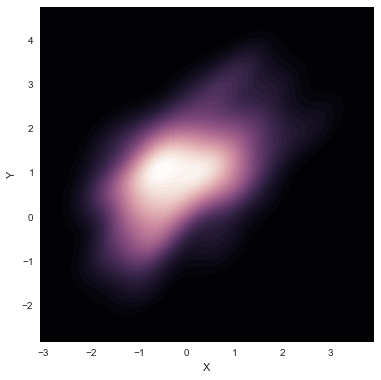

In [50]:
f, ax = plt.subplots(figsize=(6, 6))
cmap = sns.cubehelix_palette(as_cmap=True, dark=0, light=1, reverse=True)
sns.kdeplot(df.X, df.Y, cmap=cmap, n_levels=60, shade=True);

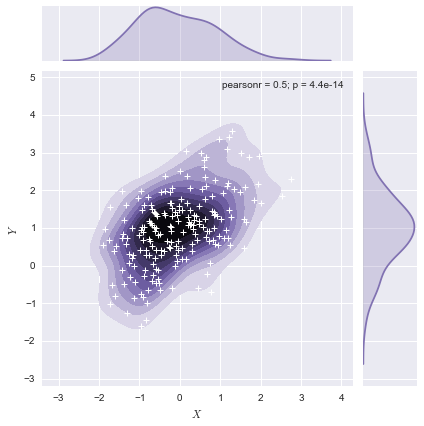

In [56]:
g = sns.jointplot(x="X", y="Y", data=df, kind="kde", color="m")
g.plot_joint(plt.scatter, c="w", s=30, linewidth=1, marker="+")
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("$X$", "$Y$")

## Visualizing pairwise relationships in a dataset

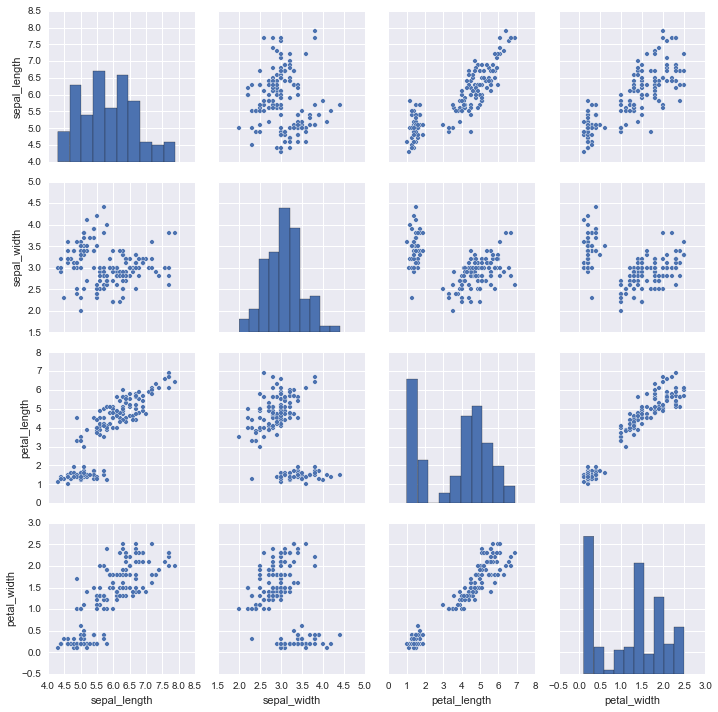

In [58]:
iris = sns.load_dataset("iris")
sns.pairplot(iris)

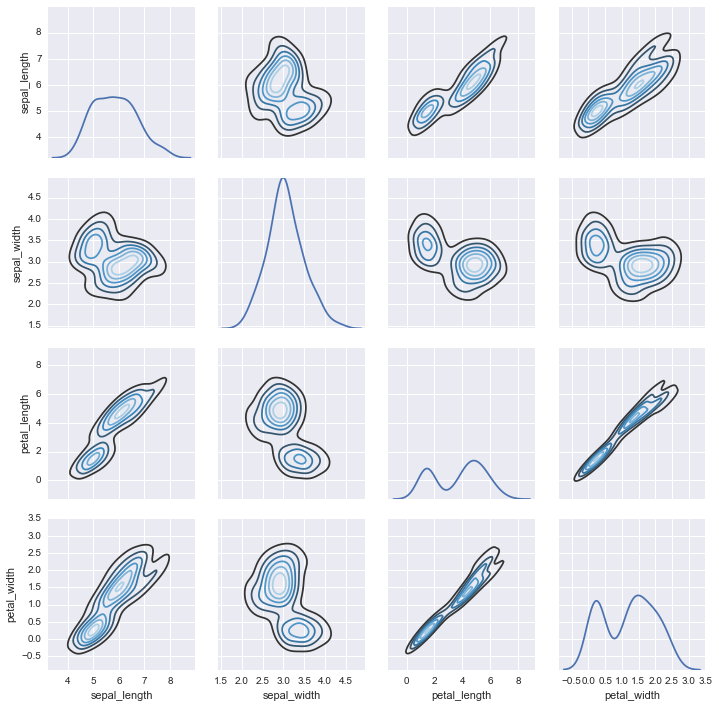

In [62]:
g = sns.PairGrid(iris)
g.map_diag(sns.kdeplot)
g.map_offdiag(sns.kdeplot, cmap="Blues_d", n_levels=6)

In [61]:
g.map_diag?